# Plotting in the scientific python ecosystem

There are a large number of plotting libraries available, but unfortunately the most commonly used, featureful, well maintained etc. is a bit low-level. Due to its ubiquity we will however focus on that one here. Namely, matplotlib.

## Matplotlib basics

The basic matplotlib API is similar to MATLAB. Matplotlib also has an object-oriented interface. The different is basically that the MATLAB style interface stores some things between functions calls (hidden state, global variables) whereas with the OO interface you get back objects which you call methods on. Usually the MATLAB-style interface is sufficient.

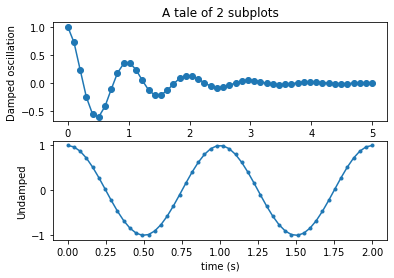

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()


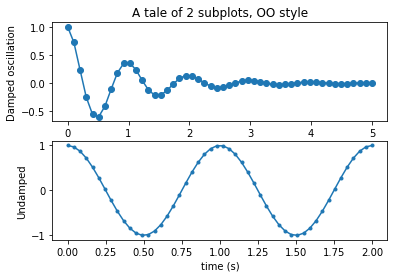

In [3]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(x1, y1, 'o-')
ax.set_title('A tale of 2 subplots, OO style')
ax.set_ylabel('Damped oscillation')

ax = fig.add_subplot(212)
ax.plot(x2, y2, '.-')
ax.set_xlabel('time (s)')
ax.set_ylabel('Undamped')

plt.show()

## Pseudocolor plots

A pseudocolor plot is a plot where you want to convert a scalar value in some range into a color value. This means that you must map the range of values into a *colormap*. Things to think about when selecting a colormap:

- The map should be perceptually uniform. From https://bids.github.io/colormap/ : A "perceptually uniform" colormap is one for which the "perceptual deltas" plot makes a simple horizontal line. (This is essentially the derivative of the colormap in perceptual space with respect to the data. We want our colormap to have the property that if your data goes from 0.1 to 0.2, this should create about the same perceptual change as if your data goes from 0.8 to 0.9. For color geeks: we're using CAM02-UCS as our model of perceptual distance.)

- It should look good when rendered in gray-scale, e.g. if someone prints the picture on a black-and-white printer. Or sometimes per-page costs in journals are lowers if everything is BW.

- It should make sense to people with the most common type of color blindness (red-green). In practice this means the color maps shouldn't use both green and red colors, so that they are not confused.

**Bad news**: The commonly used rainbow (or "jet" as it's often called) is very bad when comparing against these criteria! NEVER USE IT! It was the default in matplotlib <= 1.5, and in MATLAB for a long time.

**Good news**: Matplotlib >= 2.0 has sane defaults here! See https://matplotlib.org/users/dflt_style_changes.html . In particular, compare https://bids.github.io/colormap/images/screenshots/jet.png (matplotlib <= 1.5 default colormap) and https://bids.github.io/colormap/images/screenshots/option_d.png (>= 2.0 default colormap). As an aside, the 2.0 default colormap ("viridis") is similar to the default colormap in current versions of MATLAB ("parula").

One case where you should NOT use parula is if your data has some "natural" zero point. In that case it's better to use a "cool-warm" style colormaps, see "Diverging Colormaps" at https://matplotlib.org/examples/color/colormaps_reference.html.


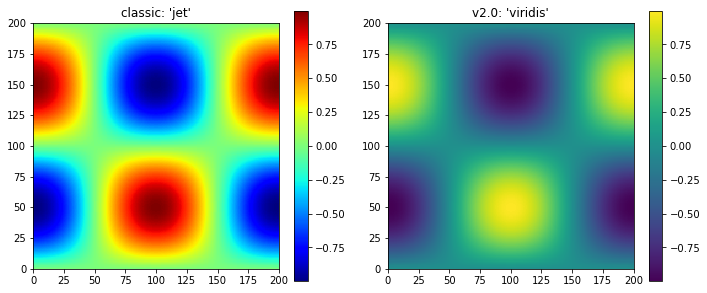

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = M = 200
X, Y = np.ogrid[0:20:N*1j, 0:20:M*1j]
data = np.sin(np.pi * X*2 / 20) * np.cos(np.pi * Y*2 / 20)

fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10, 5))
im = ax1.imshow(data, extent=[0, 200, 0, 200])
ax1.set_title("v2.0: 'viridis'")
fig.colorbar(im, ax=ax1, shrink=0.8)

im2 = ax2.imshow(data, extent=[0, 200, 0, 200], cmap='jet')
fig.colorbar(im2, ax=ax2, shrink=0.8)
ax2.set_title("classic: 'jet'")

fig.tight_layout()

In [5]:
plt.savefig('myfig.jpg')
plt.savefig?

<Figure size 432x288 with 0 Axes>

Signature: plt.savefig(*args, **kwargs)
Docstring:
Save the current figure.

Call signature::

  savefig(fname, dpi=None, facecolor='w', edgecolor='w',
          orientation='portrait', papertype=None, format=None,
          transparent=False, bbox_inches=None, pad_inches=0.1,
          frameon=None, metadata=None)

The output formats available depend on the backend being used.

Parameters
----------

fname : str or PathLike or file-like object
    A path, or a Python file-like object, or
    possibly some backend-dependent object such as
    `matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is not set, then the output format is inferred from
    the extension of *fname*, if any, and from :rc:`savefig.format`
    otherwise.  If *format* is set, it determines the output format.

    Hence, if *fname* is not a path or has no extension, remember to
    specify *format* to ensure that the correct backend is used.

Other Parameters
----------------

dpi : [ *None* | scalar > 0 | 

## Publication-quality plots with matplotlib

When doing plots for including in a publication, the low-level nature of matplotlib turns out to be an advantage, as you can (with some considerable amount of work!) modify the plots to look exactly like you want. Things to look out for

- Using the same font for labels etc. as in the document text.
- Fonts should be roughly the same size (or at least, not disproprotionately smaller/larger) as the document text.
- Save your graphs in a vector graphics format such as PDF, not as a bitmap (PNG, JPEG).
- Often in a publication with double columns per page, the graphs are relatively small, thus you need to make fonts, axis, tick marks etc. thicker to be legible.
- If possible, graphs should be legible also when printed BW. 

You can set many of these by changing the `rc` parameters, or by editing the `~/.config/matplotlib/matplotlibrc` config file. For instance, [Aalto University style guidelines](https://wiki.aalto.fi/display/aaltolatex/Home)  says that dissertations written in LaTeX should use the "New Century Schoolbook" font. In that case you might want to use the LaTeX `fouriernc` package to get math fonts matching the text font. E.g. `matplotlibrc` for an Aalto dissertation written in LaTeX could have something like

```
font.family        : serif
font.serif         : New Century Schoolbook, Century Schoolbook, TeXGyreSchola, TeX Gyre Schola, Century Schoolbook L, Times, Times New Roman, Liberation Serif, Palatino, Bookman, Computer Modern Roman
font.sans-serif    : Helvetica, Arial, TeXGyreHeros, Liberation Sans, Avant Garde, Computer Modern Sans serif
font.cursive       : Zapf Chancery, TeXGyreChorus
font.monospace     : Courier, Liberation Mono, TeXGyreCursor, Computer Modern Typewriter

ps.usedistiller    : xpdf
ps.papersize       : a4

text.usetex        : true
text.latex.unicode : true
text.latex.preamble : \usepackage{fouriernc}
```

See a long list of rc params at https://matplotlib.org/users/customizing.html.

Note that for normal day-to-day usage you DON'T want to set usetex to true, it's very slow compared to the native rendering!

Lets test fancy latex graphs:

In [2]:
import matplotlib as mpl

In [3]:
mpl.rcdefaults()
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['ps.usedistiller'] = 'xpdf'
mpl.rcParams['ps.papersize'] = 'a4'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
import numpy as np
import matplotlib.pyplot as plt

#mpl.rcdefaults()
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(x1, y1, 'o-')
ax.set_title(r'A tale of 2 subplots, OO style: $\frac{\pi}{2} \int_0^{2\pi} x^2  \mathrm{d}x$')
ax.set_ylabel('Damped oscillation')

ax = fig.add_subplot(212)
ax.plot(x2, y2, '.-')
ax.set_xlabel('time (s)')
ax.set_ylabel('Undamped')

plt.show()

RuntimeError: Failed to process string with tex because dvipng could not be found

<Figure size 640x480 with 2 Axes>

**Exercise**: Try to recreate the graph below:

![graph](img/sin.svg)

# Seaborn

For statistical plotting, in particular, there exists a project called [Seaborn](https://seaborn.pydata.org/), which is built on top of matploblib, but adds plots often used in statistical data analysis.

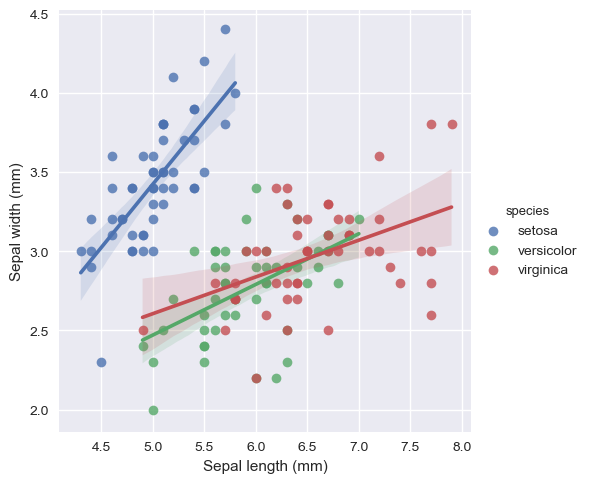

In [10]:
mpl.rcdefaults() # Seaborn doesn't like usetex=True?

import seaborn as sns
sns.set()

# Load the example tips dataset
iris = sns.load_dataset("iris")

# Plot tip as a function of toal bill across days
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True, size=5, data=iris)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")